In [1]:
#=======================================================================================
# Importing the libaries:
#=======================================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore")

#=======================================================================================

# 1) Importing the data

In [2]:
#=======================================================================================
# Reading the data:
#=======================================================================================

def read_data():
    train_data = pd.read_csv("./data/train.csv")
    print("Train data imported successfully!!")
    print("-"*50)
    test_data = pd.read_csv("./data/test.csv")
    print("Test data imported successfully!!")
    return train_data , test_data

train_data , test_data = read_data()
combine = [train_data , test_data]

#=======================================================================================

Train data imported successfully!!
--------------------------------------------------
Test data imported successfully!!


# 2) Discovering the data:

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#=======================================================================================
# Discovering the features:
#=======================================================================================

print("Train data features are:\n")
print(train_data.columns.values)
print('\n' ,"="*80 , '\n')
print("Test data features are:\n")
print(test_data.columns.values)

#=======================================================================================

Train data features are:

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Test data features are:

['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [6]:
#=======================================================================================
# Discovering the features types:
#=======================================================================================

train_data.info()
print('_'*40 , '\n')
test_data.info()

#=======================================================================================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passeng

Features discovering results:
Features of the test data are the same as features of the training data except for the Survived feature (because it's the target).
Features types:
    Categorical:
        Pclass (ordinal)
        Name (nominal)
        Sex (nominal)
    Numerical:
        Age (continuous)
        Fare (continuous)
        SibSp (discrete)
        Parch (discrete)
    Mixed:
        Ticket (numeric and alphanumeric)
        Cabin (alphanumeric)
Insights: Features types are very important for EDA step.

In [7]:
#=======================================================================================
# Discovering the missed values:
#=======================================================================================

print("Train data missed values:\n")
print(train_data.isnull().sum())
print('\n','_'*40 , '\n')
print("Test data missed values:")
print(test_data.isnull().sum())

#=======================================================================================

Train data missed values:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 ________________________________________ 

Test data missed values:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Missed values discovering results:
    Train Data:
        Age: 177/891 missed values (19.8% are missed).
        Cabin: 687/891 missed values (77.1% are missed).
        Embarked: 2/891 missed values.
    Test Data:
        Age: 86/418 missed values (20.5% are missed).
        Cabin: 327/418 missed values (78.2% are missed).
        Fare: 1/418 missed values.
Insights: Now we know what are the missed values, And we are going to discover the correlations to do what is appropriate.

In [8]:
#=======================================================================================
# Discovering the numerical data distribution :
#=======================================================================================

train_data.describe()

#=======================================================================================

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Numerical data distribution discovering results:
    The survival rate for this data is 38.3%.
    More than 75% of the passengers are below 38 years old.
    There are too few old passengers.
    Most passengers travel alone.
    There are a few outliers in the Fare feature.
insights:
    Age feature has right skewness, So if we are going to fill missing values we will not use the average.
    There are outliers in Fare, Age, SibSp and Parch features. This inspire us for EDA Step.

In [9]:
#=======================================================================================
# Discovering the categorical data distribution :
#=======================================================================================

train_data.describe(include=['O'])

#=======================================================================================

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Categorical data distribution discovering results:
    There are no duplicated names.
    64.7% of the passengers are males
    There are duplicated values in the Ticket feature (23.5% are duplicated).
    There are duplicated values in the Cabin feature (27.9% are duplicated).
    72.4% of the passengers used "S" Embarked.
insights:
    Names uniqueness gives us unsight for Data Engineering Step.
    Duplicate values in Ticket and Cabin features give us insights to make the right decision when filling missed values.
    we will fill missed Embarked values with 'S' type.

# 3) Exploratory data analysis (EDA)

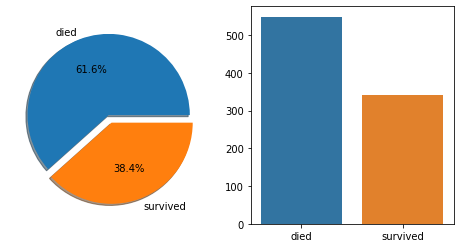

In [10]:
# ===================================================================
# Count of survived
# ===================================================================
f,ax=plt.subplots(1,2,figsize=(8,4))
train_data['Survived'].replace({0:"died",1:"survived"}).value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
sns.countplot(x = train_data["Survived"].replace({0:"died",1:"survived"}) , ax = ax[1])
ax[1].set_ylabel('')
ax[1].set_xlabel('')
plt.show()

We saw before that only 338 (38%) of the passengers survived, We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

## Discovering the features correlation with Survived:

In [11]:
# Helper functions:
def survived_bar_plot(feature):
    plt.figure(figsize = (6,4))
    sns.barplot(data = train_data , x = feature , y = "Survived").set_title(f"{feature} Vs Survived")
    plt.show()
def survived_table(feature):
    return train_data[[feature, "Survived"]].groupby([feature], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(low=0.75,high=1)
def survived_hist_plot(feature):
    plt.figure(figsize = (6,4))
    sns.histplot(data = train_data , x = feature , hue = "Survived",binwidth=5,palette = sns.color_palette(["yellow" , "green"]) ,multiple = "stack" ).set_title(f"{feature} Vs Survived")
    plt.show()

### Sex Vs Survived:

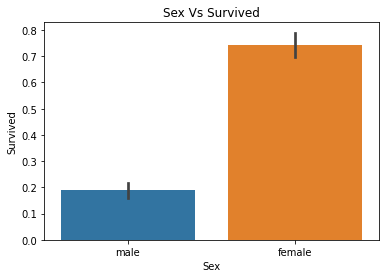

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
survived_bar_plot('Sex')
survived_table('Sex')

# Females have higher Survival rate (74%)

### Pclass Vs Survived

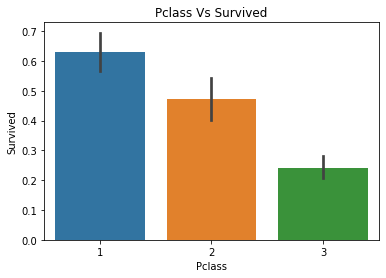

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [13]:
survived_bar_plot("Pclass")
survived_table("Pclass")

# First Pclass passengers are more likely to survive then Seconde Pclass then Third.

### Embarked Vs Survived

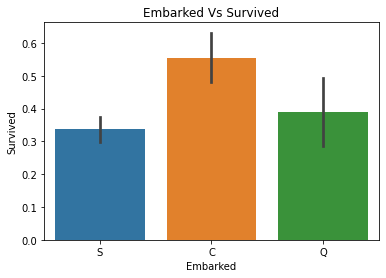

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [14]:
survived_bar_plot("Embarked")
survived_table("Embarked")

# Passengers who used C Embarked are most likely to survive, Then Q, Then S.
# (This reason may be undirect, I thinks that most of 1 Pclass passengers used C Embarked)

### Parch Vs Survived

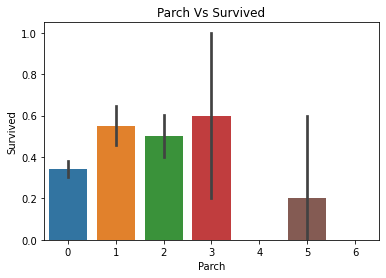

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [15]:
survived_bar_plot("Parch")
survived_table("Parch")

# Parch feature has zero correlation for some values.
# Maybe we can use it to derive more useful feature.

### SibSp Vs Survived

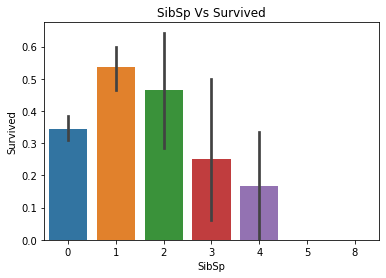

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
survived_bar_plot("SibSp")
survived_table("SibSp")

# SibSp feature has zero correlation for some values too.
# Maybe we can use it to derive more useful feature.

### Age Vs Survived

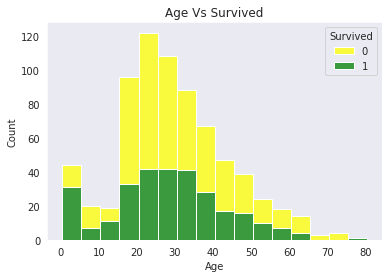

In [17]:
sns.set_style("dark") # to remove the grid.
survived_hist_plot("Age") # Note: This plot is stack plot.

# Infants (age<=5) and childrens (between 10 and 15 years old) are most likely to survive.
# elder passengers (>75) survived.
# most passengers are between 15 and 40 years old.
# insights: It's good to convert the age feature to age band groups of length 5.

## Discovering the correlation between the features:

<AxesSubplot:>

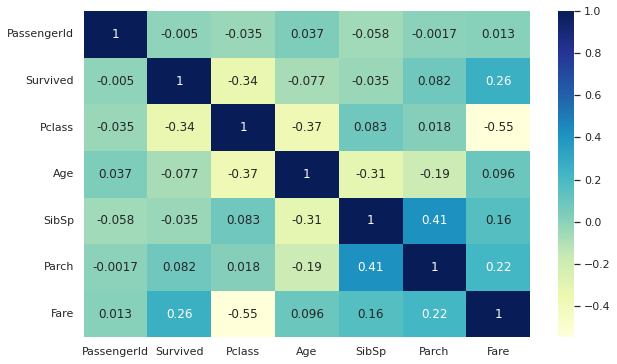

In [18]:
#=======================================================================================
# Discovering the correlations:
#=======================================================================================

sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(train_data.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

- Passenger Id has no correlation with any feature.
- PClass has strong negative correlation with age and Fare.
- Age has negative correlation with parch and sibsp.